# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# See the distribution
Here, `CGPA` column has `Normal Distribution` </br>
So here we can use `Z_Score`

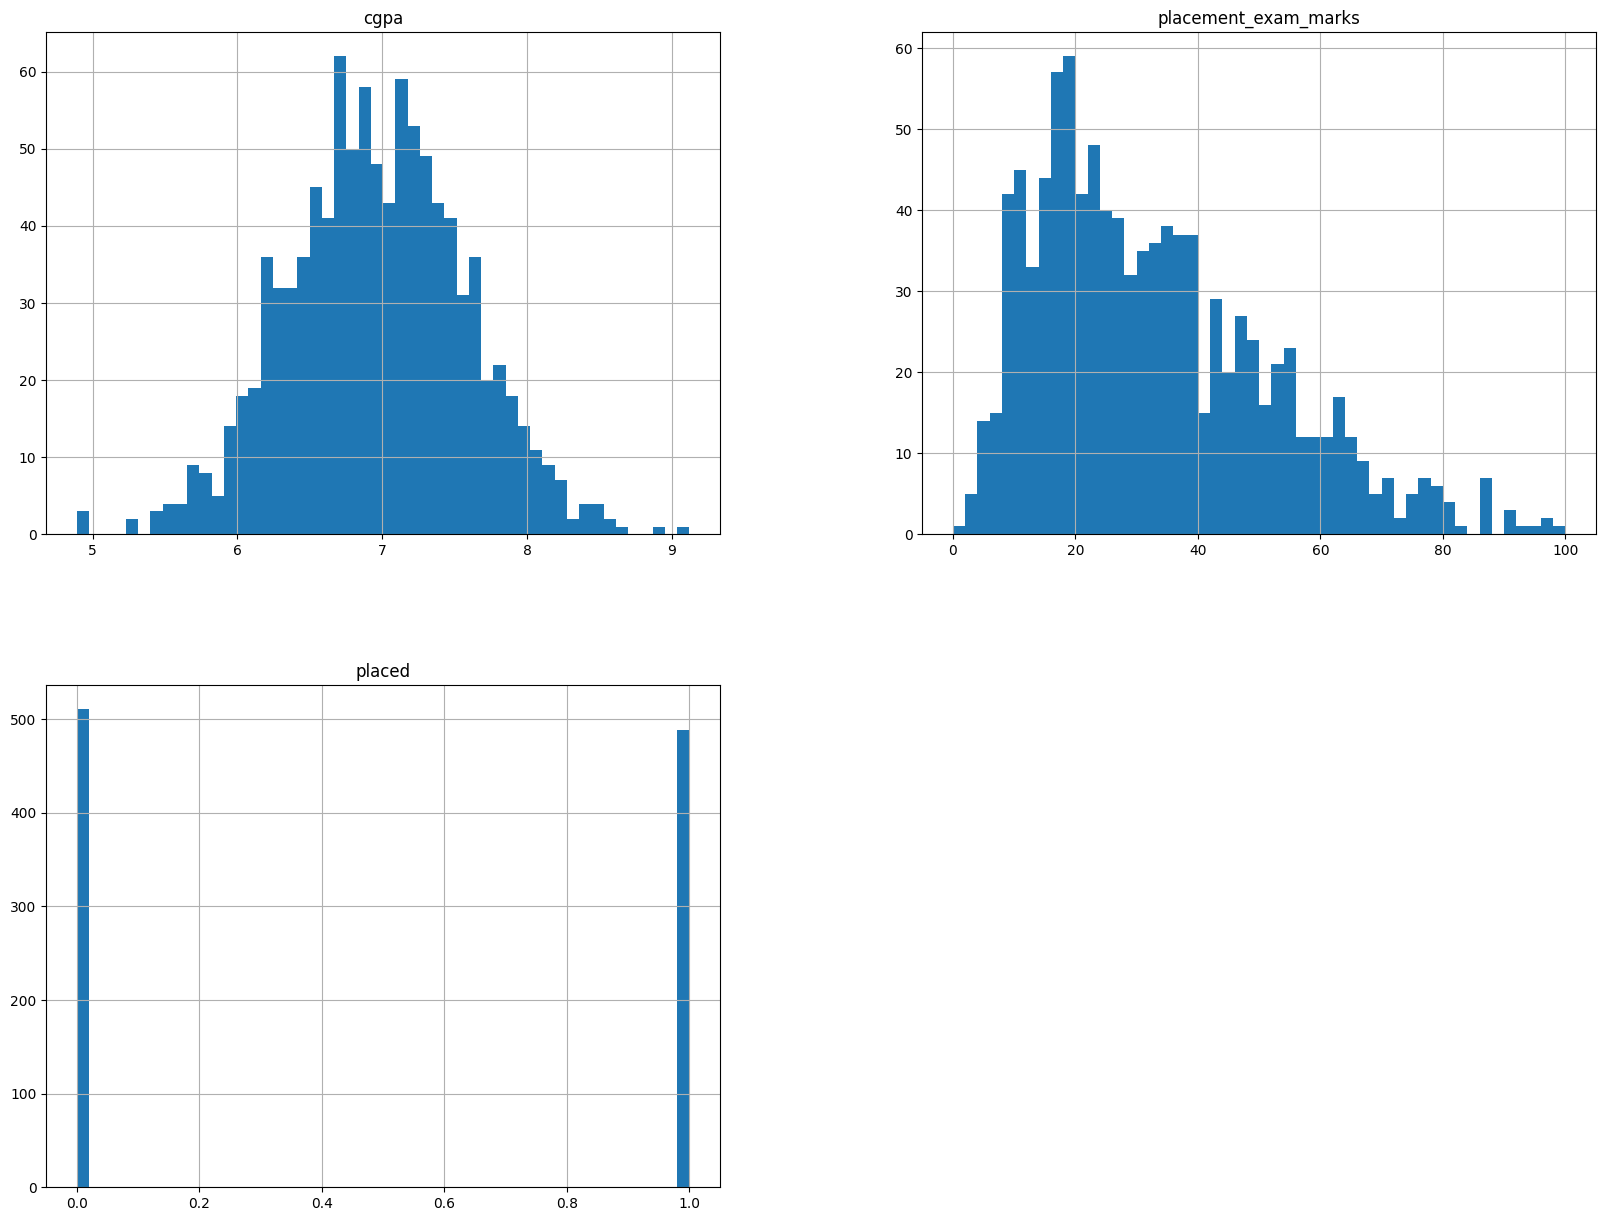

In [12]:
df.hist(bins=50, figsize=(20,15), fill=True)
plt.show()

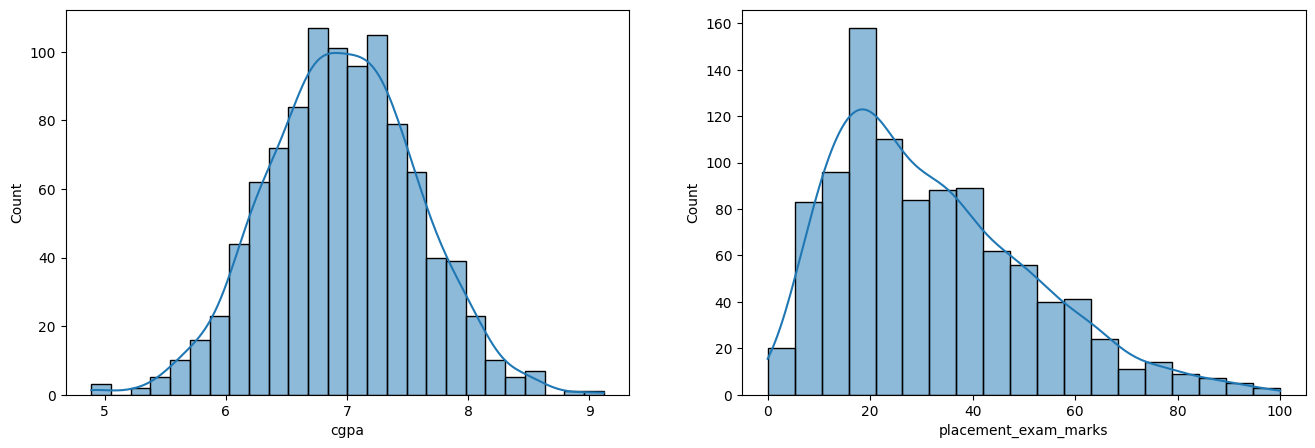

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

# See Distribution of `CGPA`

In [15]:
print('Mean: ', df['cgpa'].mean())
print('Standard Deviation: ', df['cgpa'].std())
print()
print('Min: ', df['cgpa'].min())
print('Max: ', df['cgpa'].max())
print()

Mean:  6.96124
Standard Deviation:  0.6158978751323894

Min:  4.89
Max:  9.12



# Max-Min Range of 99.7%
```
1. Max = μ + 3σ
2. Min = μ - 3σ
```

In [17]:
mx = df['cgpa'].mean() + 3*df['cgpa'].std()
mn = df['cgpa'].mean() - 3*df['cgpa'].std()
print('Max Value Allowed: ', mx)
print('Min Value Allowed: ', mn)

Max Value Allowed:  8.808933625397168
Min Value Allowed:  5.113546374602832


# See student out of range

In [24]:
outlier_std = df[(df['cgpa'] > mx) | (df['cgpa'] < mn)]
outlier_std

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [25]:
outlier_std.shape

(5, 3)

# Treatment of Outlier
```
1. Trimming
2. Capping
```

# 1. Trimming

In [21]:
new_df = df[(df['cgpa'] < mx) & (df['cgpa'] > mn)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [23]:
df.shape, new_df.shape

((1000, 3), (995, 3))

In [26]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


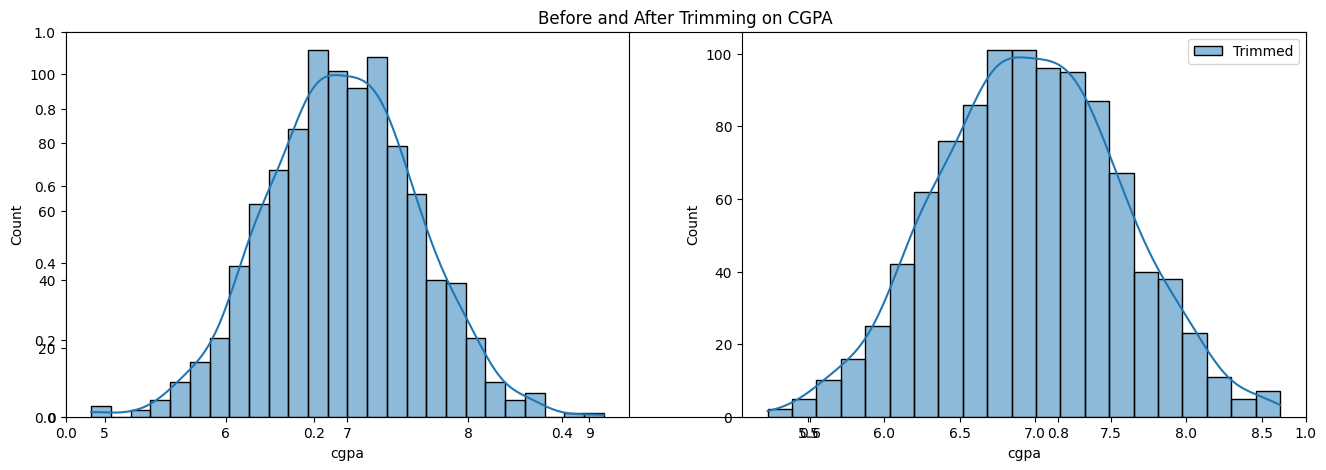

In [34]:
plt.figure(figsize=(16,5))
plt.title('Before and After Trimming on CGPA')

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, label='Original')

plt.subplot(1,2,2)
sns.histplot(new_df['cgpa'], kde=True, label='Trimmed')

plt.legend()
plt.show()

# Another Approach of `Trimming`

## Calculate the total `Z-Score`

In [35]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


## Z-Score Range
[-3 to +3]

In [36]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [37]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Get total student list out of the Range

In [38]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Conduct new DataFrame

In [39]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


# 2. Capping
```
1. Find upper and lower limit
2. Replace outlier with upper and lower limit
```

In [40]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [41]:
lower_limit, upper_limit

(5.113546374602832, 8.808933625397168)

## Use `Where` Condition for Capping
```python
np.where(x, y, z)
```
Here,
> `x` is condition </br>
> `y` is replace when `x` is true </br>
> `z` is when `x` is false </br>

Case analysis:
- if `CGPA` is Greater than `upper_limit`
    - Replace with `upper_limit`
- if `CGPA` is Lower than or Equal `upper_limit`
    - then again check:
        + if `CGPA` is lower than `lower_limit`
            - Replace with `lower_limit`
        + else as it is value

```cpp
    if(df["cgpa"] > upper_limit){
        df["cgpa"] = upper_limit;
    }
    else{
        if(df["cgpa"] < lower_limit){
            df["cgpa"] = lower_limit;
        }
        else{
            df["cgpa"] = df["cgpa"]
        }
    }
```

In [43]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [44]:
df.shape

(1000, 4)

In [45]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


<Axes: >

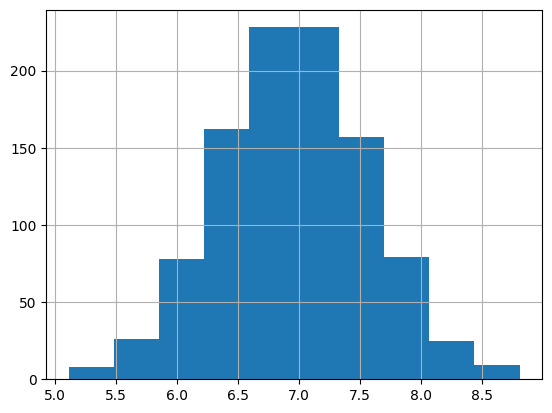

In [49]:
df['cgpa'].hist()